In [27]:
import pandas as pd
import numpy as np


In [28]:
import os
os.chdir(
    r"C:\Users\Sanjana Malkhede\Desktop\Study material\11PLACEMENT\infosys internship\ExoHabitAI"
)


In [29]:
df = pd.read_csv("data/processed/preprocessed1.csv")

df.head()


,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,st_spectype_A,...,st_spectype_M4+/-0.5,st_spectype_M4.5,st_spectype_M4.5 V,st_spectype_M4.5 Ve,st_spectype_M5.0 V,st_spectype_M5.0+0.5-0.5,st_spectype_M5.5 V,st_spectype_M8,st_spectype_M8.5,st_spectype_WD
0,2.36,195.301821,10.218653,0.1021,811.0,1.33,5594.0,-0.08221,0.016400,False,...,False,False,False,False,False,False,False,False,False,False
1,2.36,195.301821,10.218653,0.1021,811.0,1.33,5594.0,-0.08221,0.016400,False,...,False,False,False,False,False,False,False,False,False,False
2,2.36,195.301821,50.308908,0.1021,811.0,1.33,5594.0,-0.08221,0.104375,False,...,False,False,False,False,False,False,False,False,False,False
3,2.36,195.301821,50.308908,0.1021,811.0,1.33,5280.0,-0.08221,0.104375,False,...,False,False,False,False,False,False,False,False,False,False
4,2.36,195.301821,50.308908,0.1021,811.0,1.33,5338.0,-0.08221,0.104375,False,...,False,False,False,False,False,False,False,False,False,False


**Separate Features (X) and Target (y)**

In [30]:
# Define top 30% Earth-sized planets as "potentially habitable"
radius_threshold = df['pl_rade'].quantile(0.7)

y = (df['pl_rade'] <= radius_threshold).astype(int)



In [31]:
y.value_counts()


pl_rade
1    21739
0     9248
Name: count, dtype: int64

In [32]:
X = df.drop(columns=['pl_rade'])


**Train–Test Split (80–20)**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**BASELINE MODELS(Logistic Regression)**

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

lr_pipeline.fit(X_train, y_train)
print(classification_report(y_test, lr_pipeline.predict(X_test)))



              precision    recall  f1-score   support

           0       0.36      0.60      0.45      1850
           1       0.76      0.54      0.63      4348

    accuracy                           0.56      6198
   macro avg       0.56      0.57      0.54      6198
weighted avg       0.64      0.56      0.58      6198



**Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,          # shallow tree
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print(classification_report(y_test, y_pred_dt))


Decision Tree
              precision    recall  f1-score   support

           0       0.37      0.63      0.47      1850
           1       0.78      0.55      0.64      4348

    accuracy                           0.57      6198
   macro avg       0.57      0.59      0.56      6198
weighted avg       0.66      0.57      0.59      6198



**ADVANCED MODELS(Random Forest Classifier)**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.39      0.59      0.47      1850
           1       0.78      0.60      0.68      4348

    accuracy                           0.60      6198
   macro avg       0.58      0.60      0.57      6198
weighted avg       0.66      0.60      0.62      6198



**XGBoost Classifier**

In [37]:
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Pipeline = Scaling + Model (NO leakage)
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # scale numeric features
    ('model', XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])


In [39]:
xgb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [40]:
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]


In [41]:
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.57      0.11      0.18      1850
           1       0.72      0.97      0.82      4348

    accuracy                           0.71      6198
   macro avg       0.64      0.54      0.50      6198
weighted avg       0.67      0.71      0.63      6198



**Evaluate ALL Models**

In [42]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [0.56, 0.57, 0.60, 0.71],
    "Recall (Habitable)": [0.54, 0.55, 0.60, 0.97],
    "F1 (Habitable)": [0.63, 0.64, 0.68, 0.82]
})

results


,Model,Accuracy,Recall (Habitable),F1 (Habitable)
0,Logistic Regression,0.56,0.54,0.63
1,Decision Tree,0.57,0.55,0.64
2,Random Forest,0.60,0.60,0.68
3,XGBoost,0.71,0.97,0.82


**Confusion Matrix (XGBoost)**

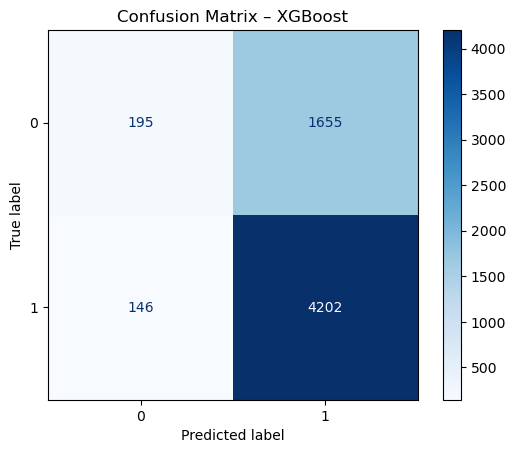

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – XGBoost")
plt.show()


In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_

print("Best Parameters:", xgb_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


**Evaluate TUNED XGBoost**

In [ ]:
from sklearn.metrics import classification_report

y_pred_best = best_xgb.predict(X_test)

print("Tuned XGBoost Classification Report")
print(classification_report(y_test, y_pred_best))


**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_best = best_xgb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned XGBoost")
plt.legend()
plt.show()


**Feature Importance**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_xgb.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values(ascending=False).head(15).plot(
    kind="barh",
    figsize=(8,6),
    title="Top 15 Feature Importances (XGBoost)"
)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import os

os.makedirs("models", exist_ok=True)


In [ ]:
import joblib
joblib.dump(xgb, "models/xgboost.pkl")


**Habitability Scoring & Ranking**

In [ ]:
df_ranked = df.copy()
df_ranked["habitability_probability"] = best_xgb.predict_proba(X)[:, 1]

df_ranked = df_ranked.sort_values(
    by="habitability_probability",
    ascending=False
)



In [ ]:
os.makedirs("data/processed", exist_ok=True)

df_ranked.to_csv(
    "data/processed/habitability_ranked.csv",
    index=False
)

